In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy

In [ ]:
np.random.seed(30)

## Define number of agents

In [ ]:
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix

n_samples = 10 #agents
n_features = 5 #dimension

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(
    n_features, alpha=0.98, smallest_coef=0.4, largest_coef=0.7, random_state=prng
)
cov = linalg.inv(prec)
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
X -= X.mean(axis=0)
X /= X.std(axis=0)

from sklearn.covariance import GraphicalLassoCV, ledoit_wolf

emp_cov = np.dot(X.T, X) / n_samples

model = GraphicalLassoCV()
model.fit(X)
cov_ = model.covariance_
prec_ = model.precision_

lw_cov_, _ = ledoit_wolf(X)
lw_prec_ = linalg.inv(lw_cov_)

In [ ]:
X.shape

(10, 5)

In [ ]:
cov_

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        , -0.21223216,  0.05182464,  0.28429337],
       [ 0.        , -0.21223216,  1.        , -0.24418845, -0.0603362 ],
       [ 0.        ,  0.05182464, -0.24418845,  1.        ,  0.0147334 ],
       [ 0.        ,  0.28429337, -0.0603362 ,  0.0147334 ,  1.        ]])

In [ ]:
np.linalg.inv(cov_)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.13509642e+00,  2.22242514e-01,
         6.93889390e-18, -3.09291122e-01],
       [ 0.00000000e+00,  2.22242514e-01,  1.11057596e+00,
         2.59672181e-01, -8.39515986e-18],
       [ 0.00000000e+00,  5.70555662e-19,  2.59672181e-01,
         1.06340895e+00, -2.00692566e-18],
       [ 0.00000000e+00, -3.09291122e-01,  0.00000000e+00,
         0.00000000e+00,  1.08792942e+00]])

In [ ]:
np.linalg.inv(cov)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.21984204,  0.        ,  0.        , -0.51785381],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        , -0.51785381,  0.        ,  0.        ,  1.21984204]])

In [ ]:
n_ag = n_samples#4#6#3#4#2
param = {'n': n_ag}
param['s'] = 1 #size of each partition (this case: each agent has access to one sample)
param['d'] = n_features #4
param['std'] = 1

In [ ]:
vectors = X#sample_gaussian_vectors(param['n'], param['d'], 0, param['std'])

In [ ]:
vectors#.shape

array([[-0.78574617,  0.37249162,  1.26953503, -1.23052368,  0.11506503],
       [-0.25382448,  0.11111599,  0.23710411, -1.23185779,  1.30884104],
       [ 0.32053994, -0.79229861,  0.83307937, -0.46778085, -0.90718989],
       [-0.64078726,  1.07381055,  0.1388    , -0.48232023,  0.51862153],
       [-1.36119709,  1.2680666 , -2.11287643,  0.76214153, -0.08707068],
       [ 1.76469477,  0.27762181,  0.53548259,  0.43375763, -0.75193548],
       [ 1.80544033,  0.5522932 , -0.75982254, -0.38213022,  0.67712705],
       [-0.15656   , -1.76911792,  0.30154345,  1.33550427, -2.05967506],
       [-0.74243101,  0.53694209, -1.24647706,  1.86051408,  1.36913271],
       [ 0.04987097, -1.63092534,  0.80363149, -0.59730473, -0.18291625]])

In [ ]:
param['y'] = np.zeros((param['n'],param['d'],param['d']))
for ag in range(param['n']):
    param['y'][ag] = np.outer(vectors[ag],vectors[ag])/param['s']

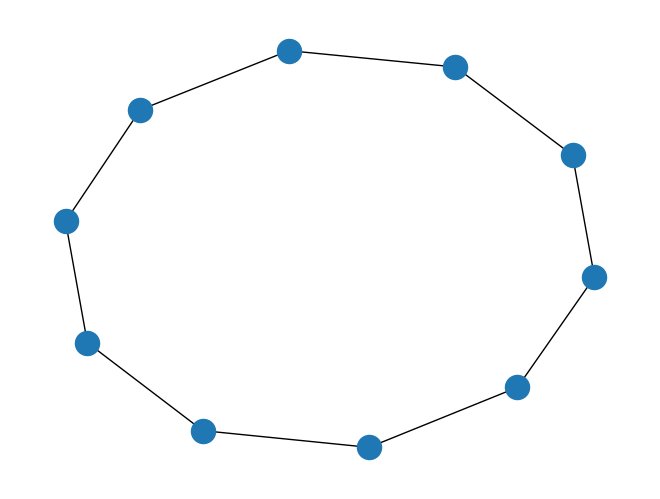

In [ ]:
G = nx.cycle_graph(n_samples)
#G = nx.circulant_graph(n_samples, [1, 2])#nx.erdos_renyi_graph(param['n'], 0.4, seed=123, directed=False) #
#G = nx.path_graph(n_samples)
#G = nx.star_graph(n_samples-1)
pos = nx.spring_layout(G, seed=47)  # Seed layout for reproducibility
nx.draw(G, pos=pos)
plt.show()

In [ ]:
Ad = nx.adjacency_matrix(G).todense()
print('Adjacency matrix: ', Ad)
Neigh = [[] for ag in range(param['n'])]#np.zeros((param['n'],param['n']))
for i in range(param['n']):
  Neigh[i] = [i]
  Neigh[i] += np.where(Ad[i,:]==1)[0].tolist() #np.sum(Ad[i,:])
print('Neighbors: ', Neigh)

Adjacency matrix:  [[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]
Neighbors:  [[0, 1, 9], [1, 0, 2], [2, 1, 3], [3, 2, 4], [4, 3, 5], [5, 4, 6], [6, 5, 7], [7, 6, 8], [8, 7, 9], [9, 0, 8]]


In [ ]:
param['neigh'] = Neigh #np.where(Ad[0,:]==1)[0].tolist()

In [ ]:
Lap = nx.laplacian_matrix(G).toarray()
print('Graph Laplacian: ', Lap)
Lap_max_eigen = np.linalg.eigvalsh(Lap)[-1]
tau_W = 1.5*Lap_max_eigen

Graph Laplacian:  [[ 2 -1  0  0  0  0  0  0  0 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0  0]
 [ 0  0 -1  2 -1  0  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0  0 -1  2 -1  0  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0  0  0 -1  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


In [ ]:
if param['n'] == 1:
    W = np.array([1.0])
    print('Mixing matrix: ', W)
else:
    W = np.identity(param['n']) - Lap/tau_W
    print('Mixing matrix: ', W)
param.update({'W':W})

Mixing matrix:  [[0.66666667 0.16666667 0.         0.         0.         0.
  0.         0.         0.         0.16666667]
 [0.16666667 0.66666667 0.16666667 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.16666667 0.66666667 0.16666667 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.66666667 0.16666667 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.16666667 0.66666667 0.16666667
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.16666667 0.66666667
  0.16666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.66666667 0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16666667 0.66666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.16666667 0.66666667 0.1666666

In [ ]:
if param['n'] == 1:
    param['eig_min'] = 1.0
else:
    param['eig_min'] = np.linalg.eigvalsh(param['W'])[0]
print(param['eig_min'])

0.3333333333333332


Define the objective function for each agent (h_i), and the one for the sum over agents (h)

In [ ]:
def IM_ag(ag,x,param):
  # objection function agent ag
  return -param['s']*(np.log(np.linalg.det(x)) - np.trace(x@param['y'][ag])) #np.sum(aux) + np.sum(aux_zero)

In [ ]:
def stack_IM(xx,param):
  # xx is an array of matrices (one per agent), xx[i] is a matrix
  out = 0.0
  for ag in range(param['n']):
    out += IM_ag(ag,xx[i], param)
  return out

In [ ]:
def IM_grad_ag(ag,x,param):
  # gradient for each agent, size d x d
  return -param['s']*(np.linalg.inv(x) - param['y'][ag])#out

In [ ]:
def projC(X,param):
  # X: symmetric matrix
  val, vec = np.linalg.eigh(X)
  val_ = np.maximum(np.minimum(val, param['ub']), param['lb'])
  return vec @ np.diag(val_) @ vec.T

In [ ]:
def in_pr(A,B):
  # input: array of matrices
    out = 0.0
    for ag in range(A.shape[0]):
        out += A[ag].ravel().dot(B[ag].ravel())#np.dot(A[ag,:], B[ag,:])
    #return np.sum(np.multiply(A,B))
    return out

# Methods

## ADT

In [ ]:
def to_vec(x):
  return x.ravel()

In [ ]:
def to_matrix(x):
  return x.reshape(param['d'],param['d'])

In [ ]:
def ADT1(x_init,u_init,t,param):
    """
    New method without linesearch, constant stepsize
    """
    beta = np.array([param['beta']]).copy()

    x_prev = np.copy(x_init)
    x_next = np.copy(x_init)
    u_prev = np.copy(u_init)
    u = np.copy(u_init)
    OV = []
    OV.append(stack_IM(x_prev,param))
    feasV = []
    stepV = []
    rel_err = []

    sumW = np.zeros_like(to_vec(x_prev[0]))

    for k in range(param['k_max']):
        feas = 0.0
        RE = 0.0
        for ag in range(param['n']):
            for ag_ in range(param['n']):
                sumW +=  - param['W'][ag,ag_]*to_vec(x_prev[ag_])   #Wt[ag,ag_]*x_prev[ag_] #matrix d x d
            sumW += to_vec(x_prev[ag])
            feas = np.maximum(np.linalg.norm(sumW),feas) #np.sqrt(in_pr(Wt@x_next,Wt@beta_next))
            u[ag] = u_prev[ag] + 0.5 * t * to_matrix(sumW)
            u_bar = 2.0 * u[ag] - u_prev[ag]
            x_next[ag] = projC(x_prev[ag] - param['beta']*t*(u_bar + IM_grad_ag(ag,x_prev[ag],param)), param)
            RE += np.linalg.norm(x_next[ag] - param['prec'], 'fro')**2
            sumW = np.zeros_like(to_vec(x_prev[0]))
        OV += [stack_IM(x_next,param)]

        err = np.sqrt(in_pr(x_next-x_prev,x_next-x_prev))
        stepV += [err]
        feasV += [feas]
        rel_err += [np.sqrt(RE)/param['n_div']]

        if (len(OV) > 1 and np.maximum(err,feas) < param['eps']): # and rho < param['rho_tol']) or rho > 10.0: #OV[-1]-OV[-2] #err,
            print('RETURN in iteration k = ',k)
            print('error = ', err, ' feasibility = ', feas)
            return x_next, t, OV, stepV, feasV, rel_err
        if k % param['k_print'] == 0:
            print('it: ', k, ', error: ', err, ', feas. = ', feas)
        x_prev = np.copy(x_next)
        u_prev = np.copy(u)

    param['beta'] = beta[0]
    #print('error = ', np.sqrt(in_pr(a-a_next,a-a_next)), ' feasibility = ', np.sqrt(in_pr(a_next - W@a_next,a_next - W@a_next)))
    return x_next, t, OV, stepV, feasV, rel_err

## ADT with linesearch

In [ ]:
def ls(theta, t_prev,u_prev,x_prev,t_out,re_hist,dx_hist,param):
  """
  Implementation of linesearch
  """

  err_out = []
  feas_out = []
  rel_error = []

  x_next = np.zeros_like(x_prev) #x_next = np.copy(x_prev)
  u = np.zeros_like(u_prev) #u = np.copy(u_prev)
  dh = np.zeros_like(x_prev)
  ls_val = []
  eps = np.finfo(float).eps

  h_val_prev = stack_IM(x_prev, param)
  alpha = np.sqrt(1 + 0.5*theta) #np.sqrt(1 + 0.99*theta)#1.0
  t = np.min([t_prev*alpha, np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min'])))]) # set t_0

  jj = 1
  for j in range(param['j_max']): #range(JMAX): #
    feas = 0.0
    RE = 0.0
    val = 0.0
    for ag in range(param['n']):
      sumW = copy.deepcopy(x_prev[ag])
      for ag_ in param['neigh'][ag]:
        sumW -= param['W'][ag,ag_]*x_prev[ag_]

      feas = np.maximum(np.linalg.norm(sumW),feas)
      u[ag] = u_prev[ag] + 0.5 * t_prev * sumW #to_matrix(sumW)

      dh[ag] = IM_grad_ag(ag,x_prev[ag],param)

      u_bar = u[ag] + t*(u[ag] - u_prev[ag])/t_prev #2.0 * u[ag] - u_prev[ag]
      x_next[ag] = projC(x_prev[ag] - param['beta']*t*(u_bar + dh[ag]), param)
      val += t*(IM_ag(ag,x_next[ag],param) - IM_ag(ag,x_prev[ag],param) - np.sum(dh[ag] * (x_next[ag] - x_prev[ag]))) - param['deltaL']*np.sum((x_next[ag] - x_prev[ag])*(x_next[ag] - x_prev[ag]))/(2.0*param['beta'])
      jj += 1
      #t_out += [t]
      dx_hist[ag] += [np.linalg.norm(x_next[ag] - x_prev[ag], 'fro')]
      re_hist[ag] += [np.linalg.norm(x_next[ag] - param['prec'], 'fro')/(param['n_div_all']*param['n'])]

      RE += np.linalg.norm(x_next[ag] - param['prec'], 'fro')**2#(param['n_prec']*param['n'])

    t_out += [t]

    ls_val += [val]
    err = np.sqrt(in_pr(x_next-x_prev,x_next-x_prev))
    err_out += [err]
    feas_out += [feas]
    rel_error += [np.sqrt(RE)/(param['n_div']*param['n'])]
      #print('val = ', val)
    if val <= eps:#eps: #0:
      return t_out, x_next, u, j+1, ls_val, err_out, feas_out, rel_error, re_hist, dx_hist
      #print('sign(val) = ', np.sign(val))
    t *= param['mu']
    #t_out += [t]
  #param['beta'] = beta[0]
  return t_out, x_next, u, jj, ls_val, err_out, feas_out, rel_error, re_hist, dx_hist

In [ ]:
def ADT_ls(x_init,u_init,param):
    """
    New method with linesearch
    """
    t = copy.deepcopy(param['t0'])
    beta = np.array([param['beta']])

    x_prev = copy.deepcopy(x_init) #x_prev = np.copy(x_init)
    u_prev = copy.deepcopy(u_init) #u_prev = np.copy(u_init)
    OV = []

    feasV = []
    stepV = []
    t_hist = [t]
    ls_track = []
    rel_err = []
    tau_next = [t]
    tht = 1.0

    Dx_hist = np.empty(shape=(param['n'],), dtype=object) #keep track relative error for each agent
    Dx_hist[:] = [[] for _ in range(param['n'])]

    RE_hist = np.empty(shape=(param['n'],), dtype=object) #keep track relative error for each agent
    RE_hist[:] = [[] for _ in range(param['n'])]

    eval_avail = param['k_max']*param['j_max'] # no. of prox-grad evaluations available
    print('# prox-grad evaluations available = ', eval_avail)
    print('#############################################')
    for k in range(param['k_max']):

        tau_next, x_next, u, j_it, ls_val, err, feas, r_e, RE_hist, Dx_hist = ls(tht,t,u_prev,x_prev,tau_next,RE_hist,Dx_hist,param)#ls(tau,u_prev,u,a_prev,param)

        eval_avail -= j_it#*param['n'] # j_it*param['n'] = no. of  prox-grad steps performed within inner loop

        tht = tau_next[-1]/t
        ls_track += [ls_val]


        OV += [stack_IM(x_next,param)]
        t_hist = copy.deepcopy(tau_next) #.append(tau_next)
            ##if k % 5 == 0 and i == 0:
            ##print("Iteration: %2d, agent: %2d, stepsize: %5.2f" % (k, i, tau[i]))
        #err = np.sqrt(in_pr(x_next-x_prev,x_next-x_prev))
        stepV += err

        feasV += feas

        rel_err += r_e
        if (len(OV) > 1 and np.maximum(err[-1],feas[-1]) < param['eps']): # and rho < param['rho_tol']) or rho > 10.0: #,OV[-1]-OV[-2] # err,
            print('RETURN in (outer) iteration k = ', k+1, '# evaluations left = ', eval_avail)
            print('error = ', err[-1], ' feasibility = ', feas[-1], 'stepsize = ', tau_next[-1], 'relative error = ', rel_err[-1])
            print('#############################################')
            return x_next, t_hist, OV, stepV, feasV, rel_err, RE_hist, Dx_hist #, ls_track
        if k % 100 == 0: #if k % param['k_print'] == 0:
            #print('it: ', k, ', error: ', err[-1], ', feas. = ', feas[-1], 'stepsize = ', tau_next[-1])
            print('# evaluations left = ', eval_avail)#j_it)
            print('found stepsize = ', tau_next[-1])
            print('(outer iteration) count k = ', k +1 , ', error: ', err[-1], ', feas. = ', feas[-1], 'relative error = ', rel_err[-1])# , 'stepsize = ', tau_next[-1])
            print('#############################################')
        beta_prev = copy.deepcopy(x_next) #np.copy(x_next)
        u_prev = copy.deepcopy(u) #np.copy(u)
        t = copy.deepcopy(tau_next[-1])#np.copy(tau_next[-1])

    return x_prev, t_hist, OV, stepV, feasV, rel_err, RE_hist, Dx_hist#, ls_track

In [ ]:
def ls2(theta, t_prev,u_prev,x_prev,re_hist,ta_hist,dx_hist,param):
  """
  Implementation of second linesearch
  RE[ag] is a list of relative errors
  """
  RE_ = np.empty(shape=(param['n'],), dtype=object) #keep track relative error for each agent
  RE_[:] = [[] for _ in range(param['n'])]

  j_ = np.zeros((param['n'],))
  x_next = copy.deepcopy(x_prev)#np.copy(x_prev)
  u = copy.deepcopy(u_prev)#np.copy(u_prev)
  dh = np.zeros_like(x_prev)
  ls_val = []
  eps = np.finfo(float).eps

  alpha = np.sqrt(1 + 0.99*theta)#1.0
  t = np.min([t_prev*alpha, np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min'])))]) # set t_0

  tau = t*np.ones((param['n'],))
  h_val_prev = np.zeros((param['n'],)) #stack_IM(x_prev, param)
  val = np.zeros((param['n'],))

  feas = 0.0

  for ag in range(param['n']):
      sumW = copy.deepcopy(x_prev[ag])
      for ag_ in param['neigh'][ag]:
          sumW -= param['W'][ag,ag_]*x_prev[ag_]

      feas = np.maximum(np.linalg.norm(sumW),feas)
      u[ag] = u_prev[ag] + 0.5 * t_prev * sumW #to_matrix(sumW)

      dh[ag] = IM_grad_ag(ag,x_prev[ag],param)

      for j in range(param['j_max']):
        u_bar = u[ag] + tau[ag]*(u[ag] - u_prev[ag])/t_prev #2.0 * u[ag] - u_prev[ag]
        x_next[ag] = projC(x_prev[ag] - param['beta']*tau[ag]*(u_bar + IM_grad_ag(ag,x_prev[ag],param)), param)

        ta_hist[ag] += [tau[ag]]

        dx_hist[ag] += [np.linalg.norm(x_next[ag] - x_prev[ag], 'fro')]

        RE_[ag] += [np.linalg.norm(x_next[ag] - param['prec'], 'fro')/(param['n']*param['n_div_all'])]
        h_val_prev[ag] = IM_ag(ag,x_prev[ag], param)
        val[ag] = tau[ag]*(IM_ag(ag,x_next[ag], param) - h_val_prev[ag] - np.sum(np.multiply(dh[ag],x_next[ag] - x_prev[ag]))) - param['deltaL']*np.sum(np.multiply(x_next - x_prev,x_next - x_prev))/(2.0*param['beta'])

        if val[ag] <= 0:#eps: #0:
          break

        tau[ag] = param['mu']*tau[ag] #param['mu']*t
        j_[ag] += 1
  t_ = np.min(tau)
  RE = 0.0
  for ag in range(param['n']):
    if tau[ag] > t_ + eps:
      u_bar = u[ag] + t_*(u[ag] - u_prev[ag])/t_prev #2.0 * u[ag] - u_prev[ag]
      x_next[ag] = projC(x_prev[ag] - param['beta']*t_*(u_bar + IM_grad_ag(ag,x_prev[ag],param)), param)
      RE_[ag] += [np.linalg.norm(x_next[ag] - param['prec'], 'fro')/(param['n']*param['n_div_all'])]
      dx_hist[ag] += [np.linalg.norm(x_next[ag] - x_prev[ag], 'fro')]
      ta_hist[ag] += [t_]
      j_[ag] += 1

    RE += np.linalg.norm(x_next[ag] - param['prec'], 'fro')**2 #RE[ag] += [np.linalg.norm(x_next[ag] - param['prec'], 'fro')**2]
    re_hist[ag] += RE_[ag]

  return t_, x_next, u, j_, feas, RE, re_hist, ta_hist, dx_hist

In [ ]:
def ADT_ls2(x_init,u_init,t,param):
    """
    New method with second linesearch
    """
    beta = np.array([param['beta']]).copy()

    x_prev = copy.deepcopy(x_init)#np.copy(x_init)
    u_prev = copy.deepcopy(u_init) #np.copy(u_init)
    OV = []

    feasV = []
    stepV = []
    t_hist = [t]
    ls_track = []
    rel_err = []

    RE_hist = np.empty(shape=(param['n'],), dtype=object) #keep track relative error for each agent
    RE_hist[:] = [[] for _ in range(param['n'])]
    t_all_hist = [[t] for _ in range(param['n'])]
    Dx_hist = np.empty(shape=(param['n'],), dtype=object)
    Dx_hist[:] = [[] for _ in range(param['n'])]
    tht = 1.0
    eval_avail = param['k_max']*param['j_max'] # no. of prox-grad evaluations available
    print('# prox-grad evaluations available = ', eval_avail)
    print('#############################################')
    for k in range(param['k_max']):
        # start iteration
        tau_next, x_next, u, j_it, feas, RE, RE_hist, t_all_hist, Dx_hist = ls2(tht, t,u_prev,x_prev,RE_hist,t_all_hist,Dx_hist,param)#ls(tau,u_prev,u,a_prev,param)

        rel_err += [np.sqrt(RE)/(param['n']*param['n_div'])]
        tht = tau_next/t

        eval_avail -= np.sum(j_it)

        OV.append(stack_IM(x_next,param))
        t_hist.append(tau_next)
            ##if k % 5 == 0 and i == 0:
            ##print("Iteration: %2d, agent: %2d, stepsize: %5.2f" % (k, i, tau[i]))
        err = np.sqrt(in_pr(x_next-x_prev,x_next-x_prev))
        stepV += [err]
        feasV += [feas]

        if (len(OV) > 1 and np.maximum(err,feas) < param['eps']): # and rho < param['rho_tol']) or rho > 10.0: #,OV[-1]-OV[-2] # err,
            print('RETURN in iteration k = ',k+1, ' # evaluations left = ', eval_avail)
            print('error = ', err, ' feasibility = ', feas, 'stepsize = ', tau_next)
            print('#############################################')
            return x_next, t_hist, OV, stepV, feasV, rel_err, RE_hist, t_all_hist, Dx_hist #, ls_track
        if k % param['k_print'] == 0:
            print('it: ', k+1, ', error: ', err, ', feas. = ', feas, 'stepsize = ', tau_next)
            print('# evaluations performed = ', np.sum(j_it))
            print('#############################################')

        beta_prev = copy.deepcopy(x_next)#np.copy(x_next)
        u_prev = copy.deepcopy(u)#np.copy(u)
        t = copy.deepcopy(tau_next)#np.copy(tau_next)

    return x_prev, t_hist, OV, stepV, feasV, rel_err, RE_hist, t_all_hist, Dx_hist  #, ls_track

In [ ]:
param['prec'] = prec
param['n_prec'] = np.linalg.norm(prec, 'fro')

In [ ]:
#param['beta'] = 1.0 #1 #2.0
param['deltaL'] = 0.5
param['deltaK'] = 0.9999 - param['deltaL']
param['mu'] = 0.95
param['penal'] = 0 #0.001 #0.0001 #0.1 #10.0

In [ ]:
param['j_max'] = 500
param['k_max'] = 500
param['k_print'] = int(param['k_max']/5)

#param['x_true'] = x_true
#param['x_true_stack'] = x_true_stack
param['eps'] = 10**(-3)

In [ ]:
init0 = np.linalg.inv(prec) #np.linalg.inv(emp_cov) #np.linalg.inv(cov)
init0.shape

(5, 5)

In [ ]:
x0 = np.zeros((param['n'], param['d'], param['d']))

param['n_div'] = 0.0
param['n_div_all'] = np.zeros((param['n'],))
for ag in range(param['n']):
  x0[ag] = np.eye(param['d'])#init0 #np.identity(param['d']) / param['n'] #np.outer(X[ag,:],X[ag,:]) / param['n'] #np.dot(X[ag,:].T, X[ag,:]) / n_samples  #init0#x0_
  param['n_div'] += np.linalg.norm(x0[ag] - param['prec'], 'fro')**2
  param['n_div_all'] = np.linalg.norm(x0[ag] - param['prec'], 'fro')
param['n_div'] = np.sqrt(param['n_div'])
u0 = np.zeros(np.shape(x0))

In [ ]:
ev, eV = np.linalg.eigh(param['prec'])

In [ ]:
ev

array([0.70198823, 1.        , 1.        , 1.        , 1.73769585])

In [ ]:
param['lb'] = 0.7
param['ub'] = 1.8

In [ ]:
param['beta'] = 1

In [ ]:
np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min'])))

np.float64(1.224622390780113)

In [ ]:
#param['beta'] = 1.0
tau0 = np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min']))) #0.001 #15 #10 #10.0*np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min'])))
#tau0**(-2)# 1.0 #
print(tau0)
param['t0'] = tau0

1.224622390780113


In [ ]:
param['beta']*tau0

np.float64(1.224622390780113)

In [ ]:
#beta_cte1, t_cte1, val_cte1, step_hist_cte1, feas_cte1, qual_cte1 = ADT1(beta0, u0, tau0, param)#ADT1(beta0, u0, tau0, param) #ADT1(beta0, u0, tau0**(-1), param)
x_cte11, t_cte11, val_cte11, step_hist_cte11, feas_cte11, rel_cte11 = ADT1(x0, u0, tau0, param) #ADT1(beta0, u0, tau0**(-1), param)

it:  0 , error:  5.1478150704934995 , feas. =  0.0
it:  100 , error:  1.1840626078536642 , feas. =  0.16687663448086038
it:  200 , error:  1.025069963756818 , feas. =  0.1357388402302099
it:  300 , error:  1.768125425912589 , feas. =  0.20847651703475686
it:  400 , error:  1.5916410731661128 , feas. =  0.17746949417344618


In [ ]:
x_11, t_11, val_11, err_11, feas_11, rel_11, RE_hist_11, dx_11 = ADT_ls(x0,u0,param)
#beta_1, t_1, val_1, step_hist_1, feas_1, qual_1 = ADT_ls(beta0, u0, tau0, param) #variable stepsize
#beta_1, t_1, val_1, step_hist_1, feas_1, qual_1, ls_track_1 = ADT_ls(x_init, u0, tau0, param)

# prox-grad evaluations available =  250000
#############################################
# evaluations left =  249988
found stepsize =  0.6965653288795471
(outer iteration) count k =  1 , error:  4.506454293109259 , feas. =  0.0 relative error =  0.17707541182753328
#############################################
# evaluations left =  249494
found stepsize =  0.687106548357247
(outer iteration) count k =  101 , error:  4.4479901474504615 , feas. =  0.0 relative error =  0.17512863035671006
#############################################
# evaluations left =  248999
found stepsize =  0.6928070969020926
(outer iteration) count k =  201 , error:  4.483220599158178 , feas. =  0.0 relative error =  0.17630063674398874
#############################################
# evaluations left =  248503
found stepsize =  0.6684789709309523
(outer iteration) count k =  301 , error:  4.332962656552235 , feas. =  0.0 relative error =  0.17132655798037938
#############################################
# evalua

In [ ]:
x_21, t_outer_21, val_21, err_21, feas_21, rel_21, rel_hist_21, t_21, dx_21 = ADT_ls2(x0,u0,tau0,param)
#beta_1, t_1, val_1, step_hist_1, feas_1, qual_1 = ADT_ls(beta0, u0, tau0, param) #variable stepsize
#beta_1, t_1, val_1, step_hist_1, feas_1, qual_1, ls_track_1 = ADT_ls(x_init, u0, tau0, param)

# prox-grad evaluations available =  250000
#############################################
it:  1 , error:  4.506454293109259 , feas. =  0.0 stepsize =  0.6965653288795471
# evaluations performed =  20.0
#############################################
it:  101 , error:  4.380570283361636 , feas. =  0.0 stepsize =  0.6761914671058606
# evaluations performed =  16.0
#############################################
it:  201 , error:  4.334583579972812 , feas. =  0.0 stepsize =  0.6687416319433449
# evaluations performed =  16.0
#############################################
it:  301 , error:  4.507416675600355 , feas. =  0.0 stepsize =  0.696720982307124
# evaluations performed =  15.0
#############################################
it:  401 , error:  4.4607700574372675 , feas. =  0.0 stepsize =  0.689174678607116
# evaluations performed =  15.0
#############################################


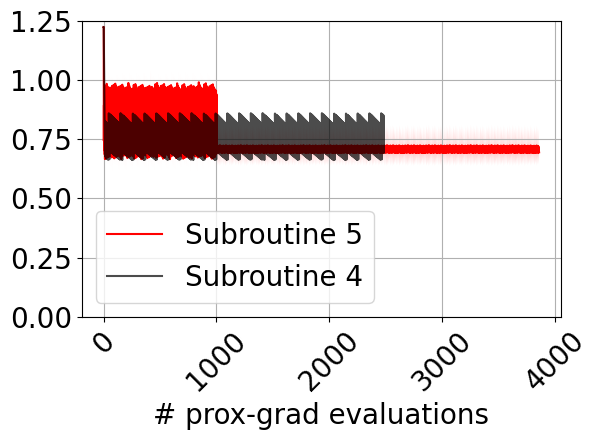

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = t_21 #rel_hist_21

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'r-', label=r'Subroutine 5', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')
plt.rcParams.update({'font.size': 20})

#################################################

#plot_aux = t_11#RE_hist_11

#rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

#for ag in range(param['n']):
#  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
#  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
#    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = t_11 #np.mean(rel_1_aux, axis=0)
#to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-', label=r'Subroutine 4', linewidth=1.5, alpha=0.7)
#plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')

#################################################

plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
#plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
#plt.ylim([0.0,1.25])
y_ticks = np.arange(0.0,1.26, 0.25)
ax.set_ylim(y_ticks[0], y_ticks[-1])
ax.set_yticks(y_ticks)
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
plt.savefig("5.2-info-matrix-step-t1.png", dpi=300, bbox_inches="tight")
plt.show()

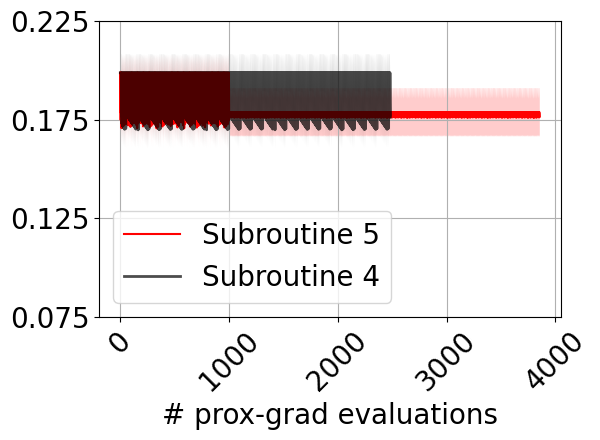

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = rel_hist_21

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)

ax.plot(x, to_plot, 'r-', label=r'Subroutine 5', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')

#################################################

plot_aux = RE_hist_11

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-', label='Subroutine 4', linewidth=2,alpha=0.7)#, label=r'Subroutine 4', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')
plt.rcParams.update({'font.size': 20})


plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
#plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
y_ticks = np.arange(0.075,0.23, 0.05)
ax.set_ylim(y_ticks[0], y_ticks[-1])
ax.set_yticks(y_ticks)
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
plt.savefig("5.2-info-matrix-rel-t1.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
tau0 = 0.1*np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min']))) #15 #10 #10.0*np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min'])))
#param['beta'] = #1.0 #tau0**(-2)# 1.0 #
print(tau0)
param['t0'] = tau0

0.1224622390780113


In [ ]:
x_cte12, t_cte12, val_cte12, step_hist_cte12, feas_cte12, rel_cte12 = ADT1(x0, u0, tau0, param) #ADT1(beta0, u0, tau0**(-1), param)

it:  0 , error:  1.1677080995593356 , feas. =  0.0
it:  100 , error:  0.02695257338545376 , feas. =  0.21807473770470587
it:  200 , error:  0.012472159365651053 , feas. =  0.12346243832515277
it:  300 , error:  0.0051693698953995905 , feas. =  0.0858867702649961
it:  400 , error:  0.003881205154004217 , feas. =  0.07023443873198558


In [ ]:
x_12, t_12, val_12, err_12, feas_12, rel_12, RE_hist_12, dx_12 = ADT_ls(x0,u0,param)

# prox-grad evaluations available =  250000
#############################################
# evaluations left =  249999
found stepsize =  0.14998499924992498
(outer iteration) count k =  1 , error:  1.3017861689398946 , feas. =  0.0 relative error =  0.10108520608280859
#############################################
# evaluations left =  249527
found stepsize =  0.6730839176845271
(outer iteration) count k =  101 , error:  4.361384918786928 , feas. =  0.0 relative error =  0.1722624378439873
#############################################
# evaluations left =  249032
found stepsize =  0.6847867348751263
(outer iteration) count k =  201 , error:  4.433657056024682 , feas. =  0.0 relative error =  0.1746528018092447
#############################################
# evaluations left =  248537
found stepsize =  0.695651470621639
(outer iteration) count k =  301 , error:  4.500804232925707 , feas. =  0.0 relative error =  0.1768868641365147
#############################################
# evaluati

In [ ]:
x_22, t_outer_22, val_22, err_22, feas_22, rel_22, rel_hist_22, t_22, dx_22 = ADT_ls2(x0,u0,tau0,param)

# prox-grad evaluations available =  250000
#############################################
it:  1 , error:  1.418813585826784 , feas. =  0.0 stepsize =  0.17275424741522277
# evaluations performed =  0.0
#############################################
it:  101 , error:  4.458156539021334 , feas. =  0.0 stepsize =  0.6887517645425435
# evaluations performed =  15.0
#############################################
it:  201 , error:  4.46544498974613 , feas. =  0.0 stepsize =  0.6899311370790713
# evaluations performed =  16.0
#############################################
it:  301 , error:  4.418635011458578 , feas. =  0.0 stepsize =  0.6823550279086312
# evaluations performed =  16.0
#############################################
it:  401 , error:  4.38537459031505 , feas. =  0.0 stepsize =  0.67696953951749
# evaluations performed =  16.0
#############################################


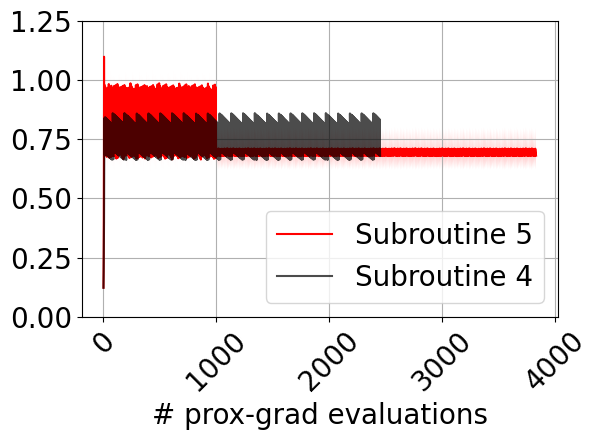

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = t_22 #rel_hist_21

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'r-', label=r'Subroutine 5', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')
plt.rcParams.update({'font.size': 20})

#################################################

#plot_aux = t_11#RE_hist_11

#rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

#for ag in range(param['n']):
#  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
#  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
#    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = t_12 #np.mean(rel_1_aux, axis=0)
#to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-', label=r'Subroutine 4', linewidth=1.5,alpha=0.7)
#plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')

#################################################

plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
#plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
y_ticks = np.arange(0.0,1.26, 0.25)
ax.set_ylim(y_ticks[0], y_ticks[-1])
ax.set_yticks(y_ticks)
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
plt.savefig("5.2-info-matrix-step-t2.png", dpi=300, bbox_inches="tight")
plt.show()

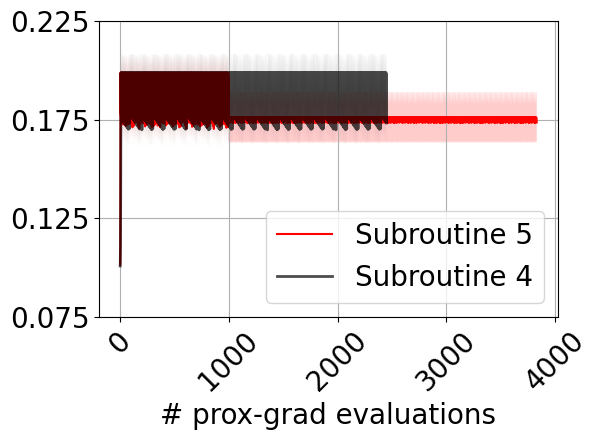

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = rel_hist_22

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)

ax.plot(x, to_plot, 'r-', label=r'Subroutine 5', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')

#################################################

plot_aux = RE_hist_12

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-', label='Subroutine 4', linewidth=2,alpha=0.7)#, label=r'Subroutine 4', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')
plt.rcParams.update({'font.size': 20})


plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
#plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
y_ticks = np.arange(0.075,0.23, 0.05)
ax.set_ylim(y_ticks[0], y_ticks[-1])
ax.set_yticks(y_ticks)
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
plt.savefig("5.2-info-matrix-rel-t2.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
tau0 = 0.01*np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min']))) #15 #10 #10.0*np.sqrt(2.0*param['deltaK']/(param['beta']*(1.0 - param['eig_min'])))
#param['beta'] = 1.0 #tau0**(-2)# 1.0 #
print(tau0)
param['t0'] = tau0

0.01224622390780113


In [ ]:
x_cte13, t_cte13, val_cte13, step_hist_cte13, feas_cte13, rel_cte13 = ADT1(x0, u0, tau0, param) #ADT1(beta0, u0, tau0**(-1), param)

it:  0 , error:  0.19716128649593945 , feas. =  0.0
it:  100 , error:  0.0007288191280980155 , feas. =  0.4255430997250106
it:  200 , error:  0.0011093812835054988 , feas. =  0.4126803167144648
it:  300 , error:  0.0013547991315320713 , feas. =  0.3978010054965326
it:  400 , error:  0.0016283969951257566 , feas. =  0.39575520152593857


In [ ]:
x_13, t_13, val_13, err_13, feas_13, rel_13, RE_hist_13, dx_13 = ADT_ls(x0,u0,param)

# prox-grad evaluations available =  250000
#############################################
# evaluations left =  249999
found stepsize =  0.014998499924992496
(outer iteration) count k =  1 , error:  0.24147227447287034 , feas. =  0.0 relative error =  0.09893437537765172
#############################################
# evaluations left =  249564
found stepsize =  0.6817152046419945
(outer iteration) count k =  101 , error:  4.414682866254728 , feas. =  0.0 relative error =  0.174023789667767
#############################################
# evaluations left =  249069
found stepsize =  0.693539391313897
(outer iteration) count k =  201 , error:  4.487747262509557 , feas. =  0.0 relative error =  0.17645147235037684
#############################################
# evaluations left =  248573
found stepsize =  0.6632336616317216
(outer iteration) count k =  301 , error:  4.300599446223379 , feas. =  0.0 relative error =  0.1702638557895775
#############################################
# evalua

In [ ]:
x_23, t_outer_23, val_23, err_23, feas_23, rel_23, rel_hist_23, t_23, dx_23 = ADT_ls2(x0,u0,tau0,param)

# prox-grad evaluations available =  250000
#############################################
it:  1 , error:  0.27813022140094823 , feas. =  0.0 stepsize =  0.017275424741522275
# evaluations performed =  0.0
#############################################
it:  101 , error:  4.393164413486103 , feas. =  0.0 stepsize =  0.6782310366667228
# evaluations performed =  16.0
#############################################
it:  201 , error:  4.347032436209394 , feas. =  0.0 stepsize =  0.6707587308685695
# evaluations performed =  16.0
#############################################
it:  301 , error:  4.304594975505609 , feas. =  0.0 stepsize =  0.6638813505278665
# evaluations performed =  16.0
#############################################
it:  401 , error:  4.472774331741038 , feas. =  0.0 stepsize =  0.6911170346381552
# evaluations performed =  15.0
#############################################


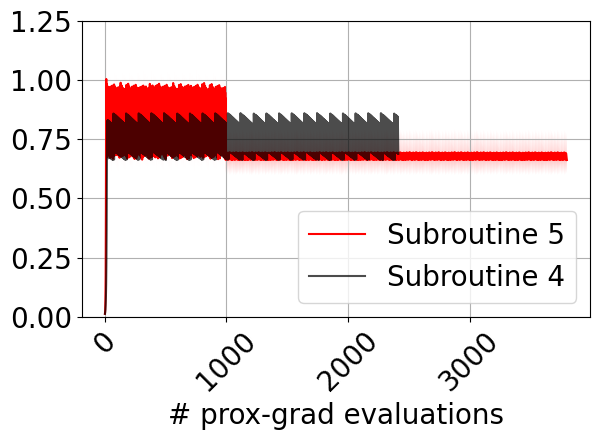

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = t_23 #rel_hist_21

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'r-', label=r'Subroutine 5', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')
plt.rcParams.update({'font.size': 20})

#################################################

#plot_aux = t_11#RE_hist_11

#rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

#for ag in range(param['n']):
#  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
#  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
#    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = t_13 #np.mean(rel_1_aux, axis=0)
#to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-', label=r'Subroutine 4', linewidth=1.5,alpha=0.7)
#plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')

#################################################

plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
#plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
y_ticks = np.arange(0.0,1.26, 0.25)
ax.set_ylim(y_ticks[0], y_ticks[-1])
ax.set_yticks(y_ticks)
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
plt.savefig("5.2-info-matrix-step-t3.png", dpi=300, bbox_inches="tight")
plt.show()

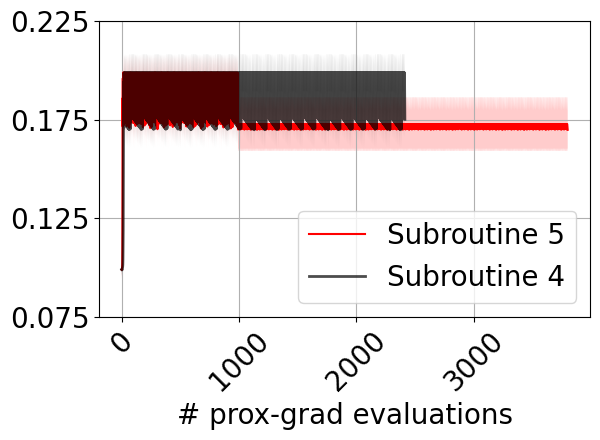

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = rel_hist_23

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)

ax.plot(x, to_plot, 'r-', label=r'Subroutine 5', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')

#################################################

plot_aux = RE_hist_13

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-', label='Subroutine 4', linewidth=2, alpha=0.7)#, label=r'Subroutine 4', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')
plt.rcParams.update({'font.size': 20})


plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
#plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
#plt.ylim([0.075,0.22])
y_ticks = np.arange(0.075,0.23, 0.05)
ax.set_ylim(y_ticks[0], y_ticks[-1])
ax.set_yticks(y_ticks)
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
plt.savefig("5.2-info-matrix-rel-t3.png", dpi=300, bbox_inches="tight")
plt.show()

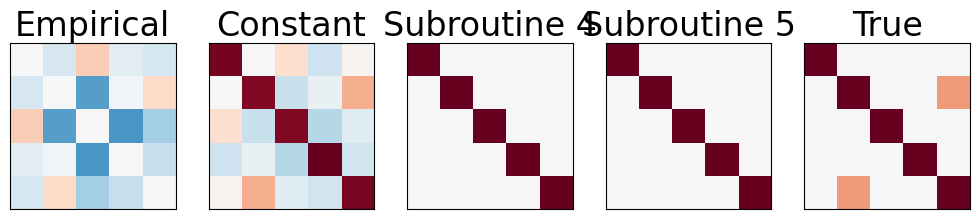

In [ ]:
# https://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the covariances
covs = [
    ("Empirical", emp_cov-cov),
    ("Constant", np.linalg.inv(x_cte11[0])),
    ("Subroutine 4", np.linalg.inv(x_11[0])),
    ("Subroutine 5", np.linalg.inv(x_21[0])),
    ("True", cov),
]
vmax = cov.max()#cov_.max()
for i, (name, this_cov) in enumerate(covs):
    plt.subplot(2, 5, i + 1)
    pos = plt.imshow(
        this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r
    )
    plt.xticks(())
    plt.yticks(())
    plt.title("%s" % name)

In [ ]:
from matplotlib import gridspec

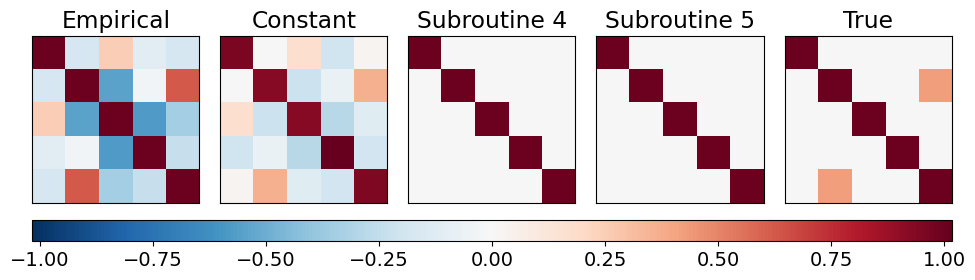

In [ ]:
# https://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
plt.figure(figsize=(10, 3))
plt.rcParams.update({'font.size': 14})
#plt.subplots_adjust(left=0.02, right=0.98)
#fig, axes = plt.subplots(1, 5, figsize=(10, 6))
#plt.subplots_adjust(left=0.02, right=0.85)
gs = gridspec.GridSpec(2, 5, height_ratios=[1, 0.1])

# plot the covariances
covs = [
    ("Empirical", emp_cov),
    ("Constant", np.linalg.inv(x_cte11[0])),
    ("Subroutine 4", np.linalg.inv(x_11[0])),
    ("Subroutine 5", np.linalg.inv(x_21[0])),
    ("True", cov),
]
#vmax = cov.max()#cov_.max()
vmin = min(this_cov.min() for i, (name, this_cov) in enumerate(covs))
vmax = max(this_cov.max() for i, (name, this_cov) in enumerate(covs))
axes = []
for i, (name, this_cov) in enumerate(covs):
    ax = plt.subplot(gs[0, i])
    axes.append(ax)
    im = ax.imshow(this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r)
    #axes[i].set_aspect("equal")
    ax.set_title("%s" % name)
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.subplot(2, 5, i + 1)
    #pos = plt.imshow(
    #    this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r
    #)
    #plt.xticks(())
    #plt.yticks(())
    #plt.title("%s" % name)
cbar_ax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cbar.set_label('Values')
plt.tight_layout()
plt.savefig("5.2-info-matrix-1.png", dpi=300, bbox_inches="tight")
plt.show()

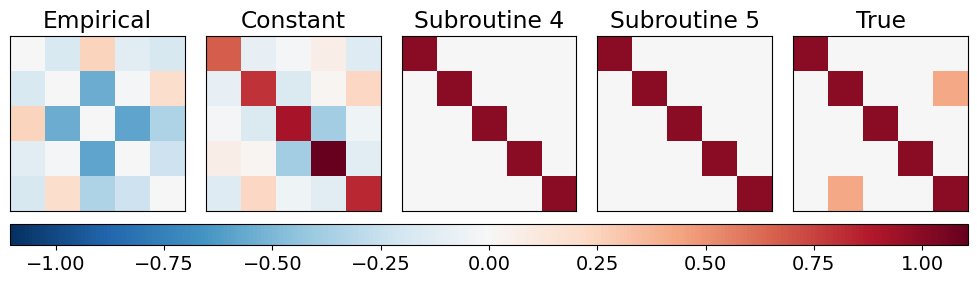

In [ ]:
# https://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
plt.figure(figsize=(10, 3))
#plt.subplots_adjust(left=0.02, right=0.98)
#fig, axes = plt.subplots(1, 5, figsize=(10, 6))
#plt.subplots_adjust(left=0.02, right=0.85)
gs = gridspec.GridSpec(2, 5, height_ratios=[1, 0.1])

# plot the covariances
covs = [
    ("Empirical", emp_cov-cov),
    ("Constant", np.linalg.inv(x_cte12[0])),
    ("Subroutine 4", np.linalg.inv(x_12[0])),
    ("Subroutine 5", np.linalg.inv(x_22[0])),
    ("True", cov),
]
#vmax = cov.max()#cov_.max()
vmin = min(this_cov.min() for i, (name, this_cov) in enumerate(covs))
vmax = max(this_cov.max() for i, (name, this_cov) in enumerate(covs))
axes = []
for i, (name, this_cov) in enumerate(covs):
    ax = plt.subplot(gs[0, i])
    axes.append(ax)
    im = ax.imshow(this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r)
    #axes[i].set_aspect("equal")
    ax.set_title("%s" % name)
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.subplot(2, 5, i + 1)
    #pos = plt.imshow(
    #    this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r
    #)
    #plt.xticks(())
    #plt.yticks(())
    #plt.title("%s" % name)
cbar_ax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cbar.set_label('Values')
plt.tight_layout()
plt.savefig("5.2-info-matrix-1.png", dpi=300, bbox_inches="tight")
plt.show()

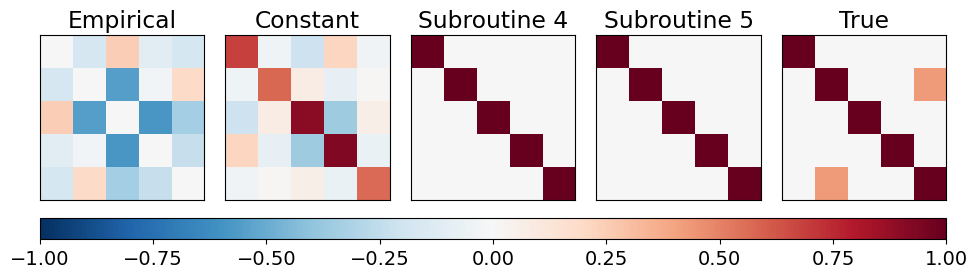

In [ ]:
# https://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
plt.figure(figsize=(10, 3))
#plt.subplots_adjust(left=0.02, right=0.98)
#fig, axes = plt.subplots(1, 5, figsize=(10, 6))
#plt.subplots_adjust(left=0.02, right=0.85)
gs = gridspec.GridSpec(2, 5, height_ratios=[1, 0.1])

# plot the covariances
covs = [
    ("Empirical", emp_cov-cov),
    ("Constant", np.linalg.inv(x_cte13[0])),
    ("Subroutine 4", np.linalg.inv(x_13[0])),
    ("Subroutine 5", np.linalg.inv(x_23[0])),
    ("True", cov),
]
#vmax = cov.max()#cov_.max()
vmin = min(this_cov.min() for i, (name, this_cov) in enumerate(covs))
vmax = max(this_cov.max() for i, (name, this_cov) in enumerate(covs))
axes = []
for i, (name, this_cov) in enumerate(covs):
    ax = plt.subplot(gs[0, i])
    axes.append(ax)
    im = ax.imshow(this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r)
    #axes[i].set_aspect("equal")
    ax.set_title("%s" % name)
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.subplot(2, 5, i + 1)
    #pos = plt.imshow(
    #    this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r
    #)
    #plt.xticks(())
    #plt.yticks(())
    #plt.title("%s" % name)
cbar_ax = plt.subplot(gs[1, :])
cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cbar.set_label('Values')
plt.tight_layout()
#plt.savefig("5.2-info-matrix-1.png", dpi=300, bbox_inches="tight")
plt.show()

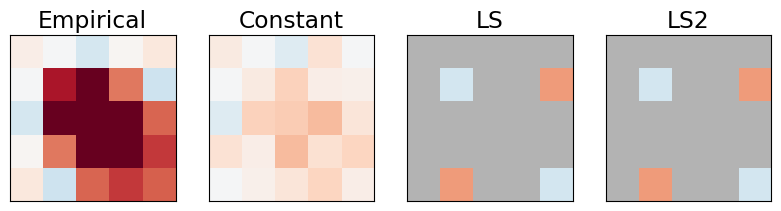

In [ ]:
# https://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the information matrices
precs = [
    ("Empirical", linalg.inv(emp_cov)-prec),
    ("Constant", x_cte11[0]-prec),
    ("LS", x_11[0]-prec),
    ("LS2", x_21[0]-prec),
    #("True", prec),
]
vmax = prec.max()#0.9 * prec.max() #prec_.max()
for i, (name, this_prec) in enumerate(precs):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(
        np.ma.masked_equal(this_prec, 0),
        interpolation="nearest",
        vmin=-vmax,
        vmax=vmax,
        cmap=plt.cm.RdBu_r,
    )
    plt.xticks(())
    plt.yticks(())
    plt.title("%s" % name)
    if hasattr(ax, "set_facecolor"):
        ax.set_facecolor(".7")
    else:
        ax.set_axis_bgcolor(".7")

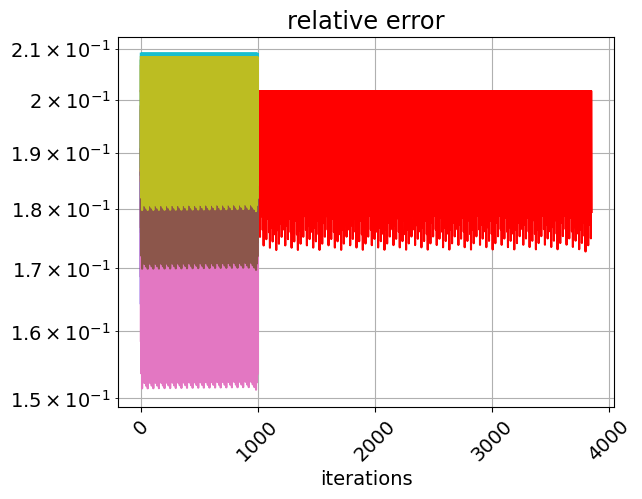

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#run_PGE = False

#if run_PGE:
  #to_plot = val_PE1
  #x = np.linspace(1, len(to_plot), num=len(to_plot))
  #ax.plot(x, to_plot, 'r-', label='PGEXTRA', linewidth=1.5)

#to_plot = step_hist_cte1#feas_cte1#step_hist_1
#x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'b-o', label='ADT constant', linewidth=1.5)
#ax.plot(x, to_plot, 'b-', linewidth=3)

colors = ['red', 'green', 'blue', 'purple', 'orange', 'tab:cyan', 'tab:gray', 'tab:pink', 'tab:brown', 'tab:olive']

for ag in range(param['n']):
  to_plot = rel_hist_21[ag]
  x = np.linspace(1, len(to_plot), num=len(to_plot))
  ax.plot(x, to_plot, color=colors[ag], label='agent '+str(ag), linewidth=1.5)

#to_plot = rel_hist_2[0]
#x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'b-o', label='agent 0', linewidth=1.5)



plt.xlabel("iterations")
#plt.ylabel("function values")
#plt.legend()
plt.grid(True, which="both")
plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
ax.set_yscale('log')
plt.title(r'relative error')
#plt.ylim([10**(6),10**(91)])
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
#y_ticks = np.arange(0,1, 0.123)
#ax.set_ylim(y_ticks[0], y_ticks[-1])
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(
#    [f"{label:.3f}" for label in y_ticks])
plt.show()

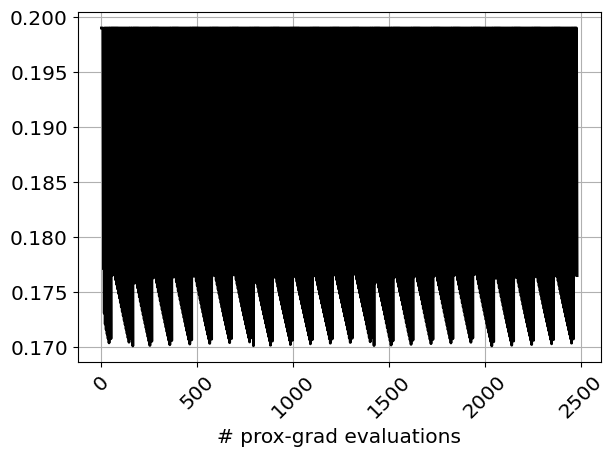

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#run_PGE = False

#if run_PGE:
  #to_plot = val_PE1
  #x = np.linspace(1, len(to_plot), num=len(to_plot))
  #ax.plot(x, to_plot, 'r-', label='PGEXTRA', linewidth=1.5)

#to_plot = step_hist_cte1#feas_cte1#step_hist_1
#x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'b-o', label='ADT constant', linewidth=1.5)
#ax.plot(x, to_plot, 'b-', linewidth=3)

#to_plot = rel_cte1
#x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'b-', label='constant', linewidth=1.5)

to_plot = rel_11
x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 4', linewidth=2)
ax.plot(x, to_plot, 'k-', linewidth=2)

#to_plot = rel_2
#x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'r-', label='Subroutine 5', linewidth=1.5)

#y_ticks = np.arange(0.09,0.145, 0.01)
#ax.set_ylim(y_ticks[0], y_ticks[-1])
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(
#    [f"{label:.2f}" for label in y_ticks]
#)

plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
#plt.legend()
plt.grid(True, which="both")
plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'relative error')
#plt.ylim([10**(6),10**(91)])
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
#y_ticks = np.arange(0,1, 0.123)
#ax.set_ylim(y_ticks[0], y_ticks[-1])
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(
#    [f"{label:.3f}" for label in y_ticks])
plt.tight_layout()
#plt.savefig("5.2-info-matrix-rel-err.png", dpi=300, bbox_inches="tight")
plt.show()

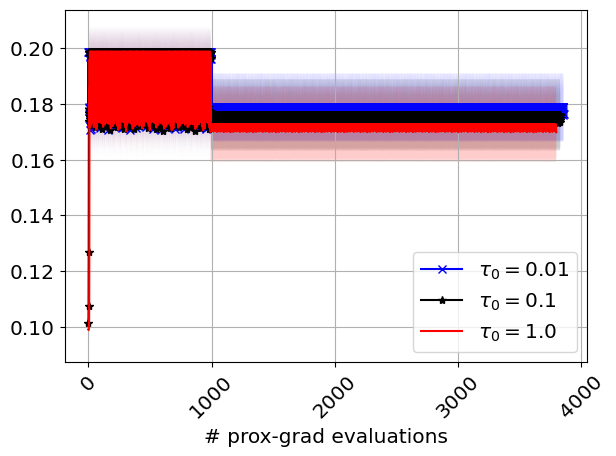

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plot_aux = rel_hist_21

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'b-x', label=r'$\tau_0 = 0.01$', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='b')

#################################################

plot_aux = rel_hist_22

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-*', label=r'$\tau_0 = 0.1$', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')

#################################################

plot_aux = rel_hist_23

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'r-', label=r'$\tau_0 = 1.0$', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')

plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
#plt.ylim([10**(6),10**(91)])
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
#plt.savefig("5.2-info-matrix-rel-5-1.png", dpi=300, bbox_inches="tight")
plt.show()

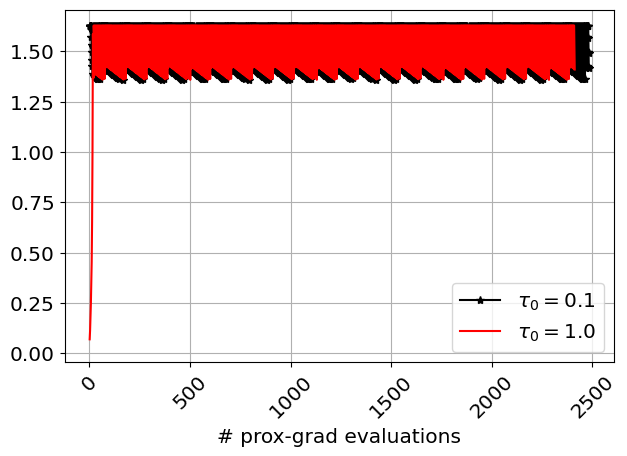

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#################################################

plot_aux = dx_11

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'k-*', label=r'$\tau_0 = 0.1$', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='k')

#################################################

plot_aux = dx_13

rel_1_aux = np.zeros((param['n'],np.max([len(tt) for tt in plot_aux])))

for ag in range(param['n']):
  rel_1_aux[ag,0:len(plot_aux[ag])] = np.array(plot_aux[ag])
  if len(plot_aux[ag]) < np.max([len(tt) for tt in plot_aux]):
    rel_1_aux[ag,len(plot_aux[ag]):np.max([len(tt) for tt in plot_aux])] = plot_aux[ag][-1]

to_plot = np.mean(rel_1_aux, axis=0)
to_plot_std = np.std(rel_1_aux, axis=0)

x = np.linspace(1, len(to_plot), num=len(to_plot))
#ax.plot(x, to_plot, 'k-', label='Subroutine 5', linewidth=1.5)
ax.plot(x, to_plot, 'r-', label=r'$\tau_0 = 1.0$', linewidth=1.5)
plt.fill_between(x, to_plot-to_plot_std, to_plot+to_plot_std, alpha=0.2, facecolor='r')

plt.xlabel("# prox-grad evaluations")
#plt.ylabel("function values")
plt.legend()
plt.grid(True, which="both")
plt.rcParams.update({'font.size': 14.5})
plt.xticks(rotation=45)
#ax.set_yscale('log')
#plt.title(r'stepsize')
#plt.ylim([10**(6),10**(91)])
#plt.savefig('Poisson-ADM.png', bbox_inches='tight', format='png')
plt.tight_layout()
#plt.savefig("5.2-info-matrix-rel-4-1.png", dpi=300, bbox_inches="tight")
plt.show()